In [1]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
data = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-2 york\MBAN 6090 - Analytics Consulting Project\webscrap\communitech\jobs_info.csv')
data.sample()

,Unnamed: 0,organization_name,title,locations,organization_topics,organization_industry_tags,url,has_description,description
2287,3198,EventMobi,IT Systems Administrator - Remote,[],"['Advertising/marketing', 'B2B', 'SaaS', 'Soft...","['Gaming', 'Information Technology', 'Software']",https://www1.communitech.ca/companies/eventmob...,True,"<div data-testid=""careerPage""><div id=""descrip..."


In [3]:
from bs4 import BeautifulSoup

In [4]:
sample_text = BeautifulSoup(data.description[4], 'html.parser').get_text()
sample_text

'About Us: Deep Genomics is a startup company that aims to revolutionize drug development by leveraging expertise in artificial intelligence (AI) and genome biology to decode RNA biology. Our proprietary platform, the AI Workbench, enables us to decode the enormous complexity of RNA biology to find novel targets, mechanisms, and molecules that are not accessible through traditional methods. We use this advanced technology to discover genetic targets for human diseases, and develop steric-blocking oligonucleotides (SBOs) that achieve expression increase for the treatment of genetic disease. Founded in 2015, our multidisciplinary team includes expertise in a diverse range of disciplines including those found in a traditional drug company, as well as genetics, machine learning, laboratory automation, and software engineering. Deep Genomics is based in Toronto, Ontario with an additional location in Cambridge, Massachusetts. What You will Be Doing: As a (Senior) Research Scientist of Stati

In [5]:

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(sample_text)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

counts = {}

for i in word_tokens:
    if i in counts.keys():
        counts[i] += 1
    else:
        counts[i] = 1
counts

{'About': 1,
 'Us': 1,
 ':': 5,
 'Deep': 4,
 'Genomics': 4,
 'is': 2,
 'a': 5,
 'startup': 1,
 'company': 2,
 'that': 4,
 'aims': 1,
 'to': 10,
 'revolutionize': 1,
 'drug': 2,
 'development': 2,
 'by': 2,
 'leveraging': 1,
 'expertise': 2,
 'in': 11,
 'artificial': 1,
 'intelligence': 1,
 '(': 7,
 'AI': 3,
 ')': 7,
 'and': 22,
 'genome': 2,
 'biology': 5,
 'decode': 2,
 'RNA': 2,
 '.': 30,
 'Our': 1,
 'proprietary': 1,
 'platform': 1,
 ',': 35,
 'the': 14,
 'Workbench': 1,
 'enables': 1,
 'us': 1,
 'enormous': 1,
 'complexity': 1,
 'of': 13,
 'find': 1,
 'novel': 1,
 'targets': 3,
 'mechanisms': 1,
 'molecules': 1,
 'are': 2,
 'not': 1,
 'accessible': 1,
 'through': 1,
 'traditional': 2,
 'methods': 1,
 'We': 1,
 'use': 1,
 'this': 1,
 'advanced': 1,
 'technology': 2,
 'discover': 1,
 'genetic': 5,
 'for': 9,
 'human': 6,
 'diseases': 1,
 'develop': 1,
 'steric-blocking': 1,
 'oligonucleotides': 1,
 'SBOs': 1,
 'achieve': 1,
 'expression': 1,
 'increase': 1,
 'treatment': 1,
 'disease

In [6]:

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

filtered_sentence = [i for i in word_tokens if i not in stop_words]
filtered_sentence

['About',
 'Us',
 ':',
 'Deep',
 'Genomics',
 'startup',
 'company',
 'aims',
 'revolutionize',
 'drug',
 'development',
 'leveraging',
 'expertise',
 'artificial',
 'intelligence',
 '(',
 'AI',
 ')',
 'genome',
 'biology',
 'decode',
 'RNA',
 'biology',
 '.',
 'Our',
 'proprietary',
 'platform',
 ',',
 'AI',
 'Workbench',
 ',',
 'enables',
 'us',
 'decode',
 'enormous',
 'complexity',
 'RNA',
 'biology',
 'find',
 'novel',
 'targets',
 ',',
 'mechanisms',
 ',',
 'molecules',
 'accessible',
 'traditional',
 'methods',
 '.',
 'We',
 'use',
 'advanced',
 'technology',
 'discover',
 'genetic',
 'targets',
 'human',
 'diseases',
 ',',
 'develop',
 'steric-blocking',
 'oligonucleotides',
 '(',
 'SBOs',
 ')',
 'achieve',
 'expression',
 'increase',
 'treatment',
 'genetic',
 'disease',
 '.',
 'Founded',
 '2015',
 ',',
 'multidisciplinary',
 'team',
 'includes',
 'expertise',
 'diverse',
 'range',
 'disciplines',
 'including',
 'found',
 'traditional',
 'drug',
 'company',
 ',',
 'well',
 'ge

In [7]:
stop_words = set(stopwords.words('english'))
filtered_token = [i for i in word_tokens if i not in stop_words]
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(t) for t in filtered_token]

In [8]:
stemmed_tokens

['about',
 'us',
 ':',
 'deep',
 'genom',
 'startup',
 'compani',
 'aim',
 'revolution',
 'drug',
 'develop',
 'leverag',
 'expertis',
 'artifici',
 'intellig',
 '(',
 'ai',
 ')',
 'genom',
 'biolog',
 'decod',
 'rna',
 'biolog',
 '.',
 'our',
 'proprietari',
 'platform',
 ',',
 'ai',
 'workbench',
 ',',
 'enabl',
 'us',
 'decod',
 'enorm',
 'complex',
 'rna',
 'biolog',
 'find',
 'novel',
 'target',
 ',',
 'mechan',
 ',',
 'molecul',
 'access',
 'tradit',
 'method',
 '.',
 'we',
 'use',
 'advanc',
 'technolog',
 'discov',
 'genet',
 'target',
 'human',
 'diseas',
 ',',
 'develop',
 'steric-block',
 'oligonucleotid',
 '(',
 'sbo',
 ')',
 'achiev',
 'express',
 'increas',
 'treatment',
 'genet',
 'diseas',
 '.',
 'found',
 '2015',
 ',',
 'multidisciplinari',
 'team',
 'includ',
 'expertis',
 'divers',
 'rang',
 'disciplin',
 'includ',
 'found',
 'tradit',
 'drug',
 'compani',
 ',',
 'well',
 'genet',
 ',',
 'machin',
 'learn',
 ',',
 'laboratori',
 'autom',
 ',',
 'softwar',
 'engin',
 

In [9]:
import sys
print(sys.version)
print(sys.executable)

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
c:\Users\srika\AppData\Local\Programs\Python\Python312\python.exe


In [10]:
import spacy

In [11]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(sample_text)
noun =[]
verb = []
adj = []
for token in doc:
    if token.pos_ == 'NOUN':
        noun.append(token)
    if token.pos_ == 'VERB':
        verb.append(token)
    if token.pos_ == 'ADJ':
        adj.append(token)
print(noun)
print(verb)
print(adj)

[company, drug, development, expertise, intelligence, biology, biology, platform, complexity, biology, targets, mechanisms, molecules, methods, technology, targets, diseases, oligonucleotides, SBOs, expression, increase, treatment, disease, team, expertise, range, disciplines, drug, company, genetics, machine, learning, laboratory, automation, software, engineering, location, scale, data, sets, genome, exome, array, targets, oligonucleotide, therapeutics, efforts, effect, predictors, data, techniques, candidate, genes, machine, scientists, development, improvement, effect, prediction, models, genetics, bioinformatics, teams, target, biology, team, PhD, biostatistics, genetics, discipline, publication, record, experience, scale, data, analysis, programming, skills, shell, understanding, genetics, understanding, biology, capacity, setting, prioritizes, teamwork, collaboration, communication, team, department, standards, rigor, integrity, thinking, curiosity, commitment, innovation, commu

In [12]:
from mlxtend.preprocessing import TransactionEncoder

In [13]:
data.shape

(4182, 9)

In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Split the strings in 'organization_topics' column and convert it to a list of lists
dataframe = list(data['organization_topics'].apply(lambda x: x.split(',')))

# Fit and transform the data using TransactionEncoder
encoder = TransactionEncoder().fit(dataframe)
encoder_array = encoder.transform(dataframe)

# Create a DataFrame with columns from encoder
dataframe = pd.DataFrame(encoder_array, columns=encoder.columns_)

# Remove single quotes and square brackets from column names
dataframe.columns = dataframe.columns.str.replace(r"['\[\]]", '', regex=True)

# Group columns with the same name
dataframe = dataframe.groupby(dataframe.columns, axis=1).any()

dataframe.head()


C:\Users\srika\AppData\Local\Temp\ipykernel_16872\2433572009.py:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dataframe = dataframe.groupby(dataframe.columns, axis=1).any()


,,1-9,10-49,100-499,44570,50-99,500+,AI/ML,Advertising/marketing,Aerospace,...,Healthcare & wellness,Manufacturing,Marketplace,Post secondary learning,Research,SaaS,Scaleup (50-99 employees),Semiconductors,Social enterprise,Software
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Split the strings in 'organization_topics' column and convert it to a list of lists
dataframe_2 = list(data['organization_industry_tags'].apply(lambda x: x.split(',')))

# Fit and transform the data using TransactionEncoder
encoder = TransactionEncoder().fit(dataframe_2)
encoder_array = encoder.transform(dataframe_2)

# Create a DataFrame with columns from encoder
dataframe_2 = pd.DataFrame(encoder_array, columns=encoder.columns_)

# Remove single quotes and square brackets from column names
dataframe_2.columns = dataframe_2.columns.str.replace(r"['\[\]]", '', regex=True)

# Group columns with the same name
dataframe_2 = dataframe_2.groupby(dataframe_2.columns, axis=1).any()

dataframe_2.head()

C:\Users\srika\AppData\Local\Temp\ipykernel_16872\1928121454.py:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dataframe_2 = dataframe_2.groupby(dataframe_2.columns, axis=1).any()


,,DeepTech,Ecommerce & Marketplace,Education,Energy,Fashion,Finance,Food,Gaming,Government and Military,...,Hardware,Health,Information Technology,Manufacturing,Media,Real Estate,Sales and Marketing,Software,Transportation,Travel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
dataframe_3 = data['title']
dataframe_3

0               Director of Sales, Enterprise Acquisition
1       Senior Software Developer | Développeur logici...
2                                         Chemistry Co-op
3       Senior Talent Acquisition Partner (15 months c...
4       (Senior) Research Scientist - Statistical Gene...
                              ...                        
4177                                  hr@paymentsource.ca
4178             Intermediate/Senior Full Stack Developer
4179               Data Scientist / Senior Data Scientist
4180                            Product Support Associate
4181                            Implementation Consultant
Name: title, Length: 4182, dtype: object

In [17]:
data_2 = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-2 york\MBAN 6090 - Analytics Consulting Project\webscrap\communitech\jobs.csv')
data_2.sample(5)

,Created At,Locations,Organization ID,Organization Name,Organization Logo URL,Organization Slug,Organization Topics,Organization Industry Tags,Organization Stage,Organization Head Count,Source,Slug,Title,URL,Featured,Has Description
3719,1689629206,[],21529,Nuvei,https://cdn.filepicker.io/api/file/U2jZGbooTwK...,nuvei,"['500+', 'B2B', 'Finance', 'SaaS', 'Software']",['Finance'],ipo,5.0,career_page,27848811-people-business-partner,People Business Partner,https://apply.workable.com/nuvei/j/6F10A19F74,False,True
3746,1689416341,['Remote'],8803,Busbud,https://cdn.filestackcontent.com/3wvFpGhRRqI8X...,busbud,"['50-99', 'B2C', 'Marketplace', 'Software', 'T...","['Software', 'Transportation', 'Travel']",other,3.0,career_page,27794699-email-marketing-manager,Email Marketing Manager,https://busbud.applytojob.com/apply/cQ2yEYlEgh...,False,False
3216,1692280897,"['Stuttgart, Germany']",9403,Algolux,https://cdn.filestackcontent.com/OawGVuDSKyGNY...,algolux,"['AI/ML', 'B2B', 'C100 alumni', 'Software', 'T...","['DeepTech', 'Hardware', 'Information Technolo...",series_b,3.0,career_page,28812475-senior-automotive-engineer-telematics...,Senior Automotive Engineer - Telematics Contro...,https://boards.greenhouse.io/torcrobotics/jobs...,False,True
3798,1689156388,['United States'],21787,Lufa Farms,https://cdn.filepicker.io/api/file/LSGP4R35T2a...,lufa-farms,"['B2B', 'Food & Beverage', 'Hardware (non-robo...","['Finance', 'Food', 'Sustainability']",series_b,4.0,career_page,27656701-procurement-manager,Procurement Manager,https://montreal.lufa.com/en/careers/procureme...,False,True
77,1697801066,"['Toronto, ON, Canada']",22386,Interac,https://cdn.filestackcontent.com/mRbANWlORpGo3...,interac,[],['Finance'],other,4.0,career_page,30938730-product-leader-e-transfer,"Product Leader, e-Transfer",https://interac.wd3.myworkdayjobs.com/Interac/...,False,False


In [18]:
data_2.shape

(5980, 16)

In [19]:
title = data_2['Title'].value_counts()

title = title.reset_index()
title.columns = ['Title', 'Count']
title['Title'] = title['Title'].apply(lambda x: x.lower())
title['Title'] = title['Title'].apply(lambda x: x.replace('-',''))

In [20]:
title['Title']

0                    sales development representative
1                                   account executive
2                 business development representative
3                                  software developer
4                            customer success manager
                            ...                      
4140    concierge security engineer tech lead (m/w/d)
4141                  business intelligence developer
4142         senior platform observability specialist
4143                        technical release manager
4144                        product support associate
Name: Title, Length: 4145, dtype: object

In [21]:
# Check if the 'job_titles' variable contains 'data' or 'business'
for i in title['Title']:
    words = i.split()  # Split the title into words
    printed = False  # Variable to track if the title has been printed
    
    if 'data' in words:  # Check if 'data' is in the list of words
        print(i)
        printed = True
    
    if 'business' in words and not printed:  # Check if 'business' is in the list of words and title hasn't been printed yet
        print(i)


business development representative
data scientist
business development manager
senior data scientist
data engineer
people business partner product emea
educator, data scientist
business development representative (bdr)
people business partner gtm emea
business development specialist
associate educator, data scientist
director group business operations
people operations business partner, retail
intermediate software engineer, business insights
data architect
senior data engineer
data engineer, analytics
business development associate  winter 2024
senior data analyst
business development representative  remote
data analyst
outbound business development representative
business operations manager
data platform developer c#
senior business development manager
director, data engineering & business intelligence
staff data scientist  search
senior human resources business partner
business development
business development representative (east coast)
business analyst (oracle fusion cloud)
busin

<Axes: ylabel='Title'>

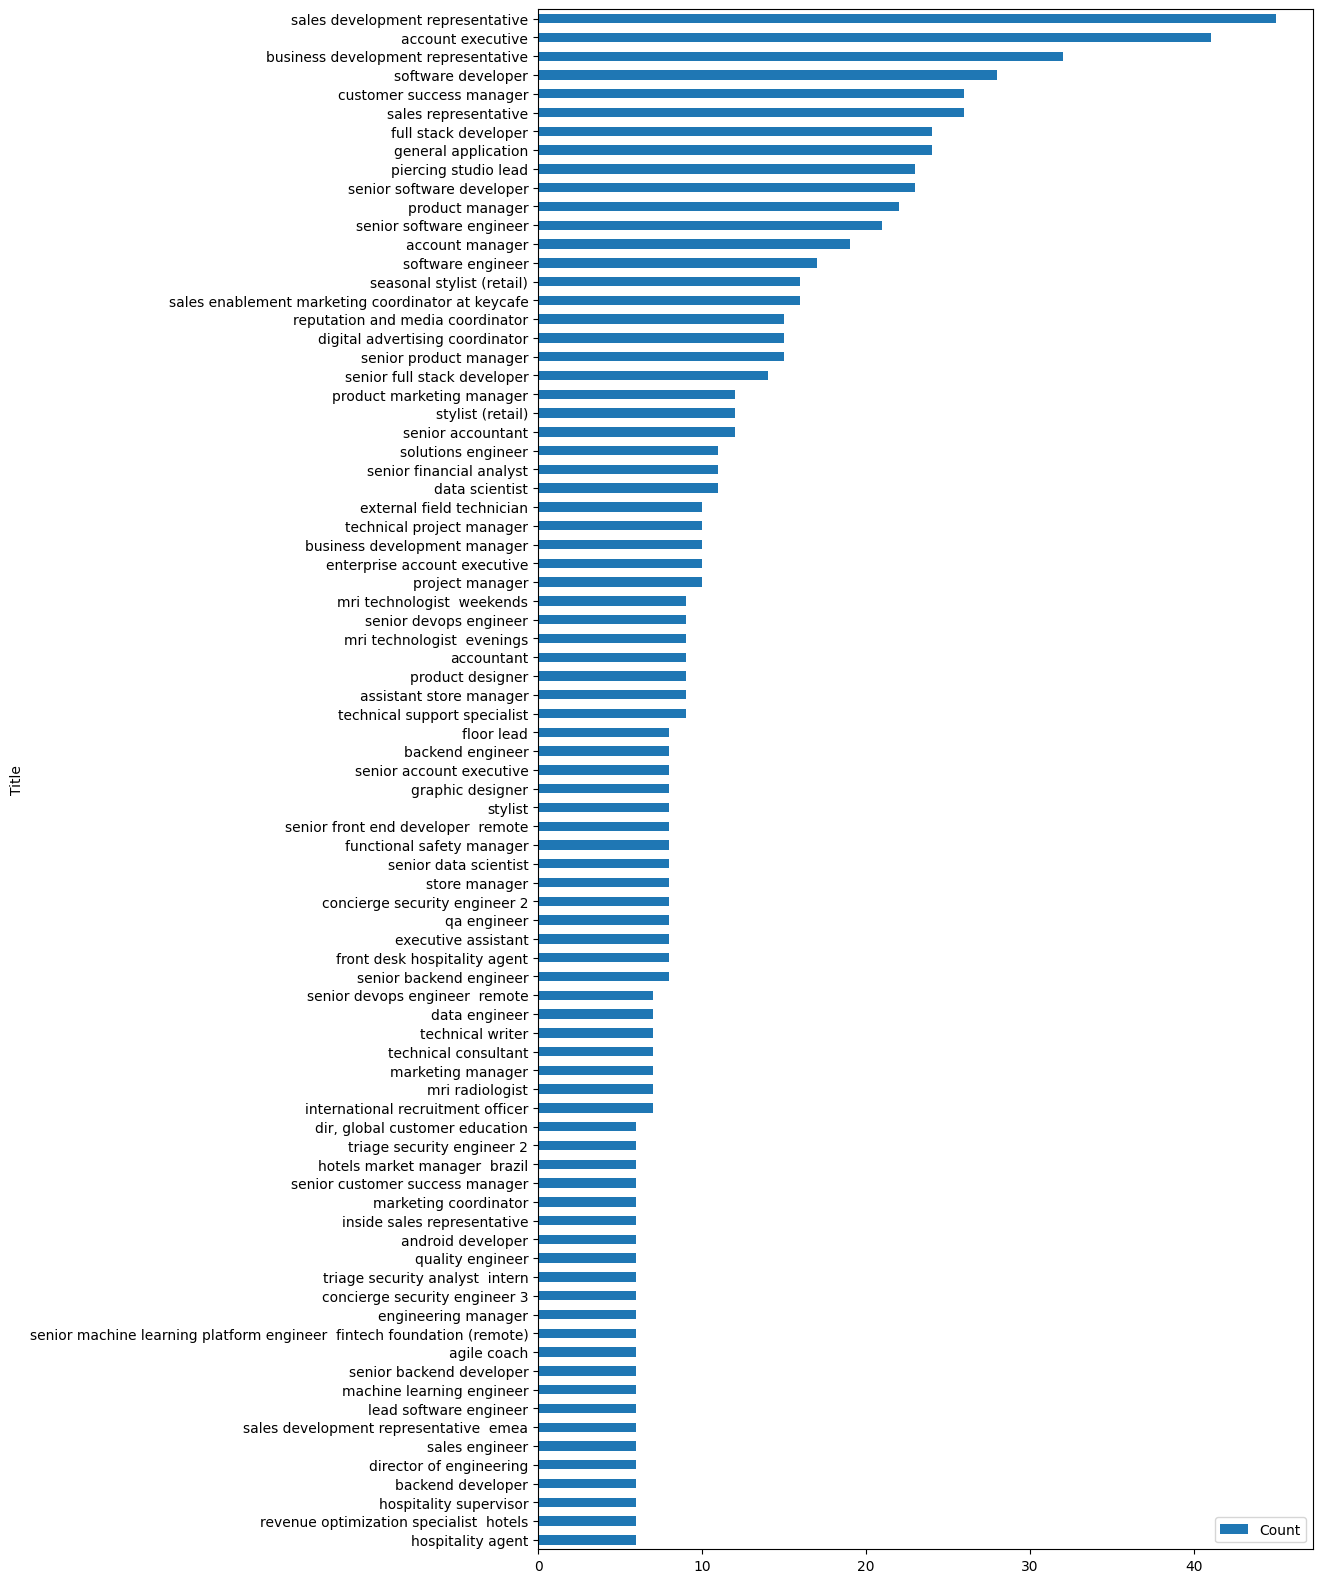

In [22]:
title = title [title['Count']>5]
title = title.sort_values(by='Count', ascending=True)
title.plot(x='Title', y='Count', kind='barh', figsize=(10, 20))